In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [37]:
d=pd.read_csv('50_Startups.csv')
d

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [38]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [39]:
d.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [40]:
d_float=list(d.select_dtypes(float).columns)
d_float

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

In [41]:
d.describe(include='O')

,State
count,50
unique,3
top,New York
freq,17


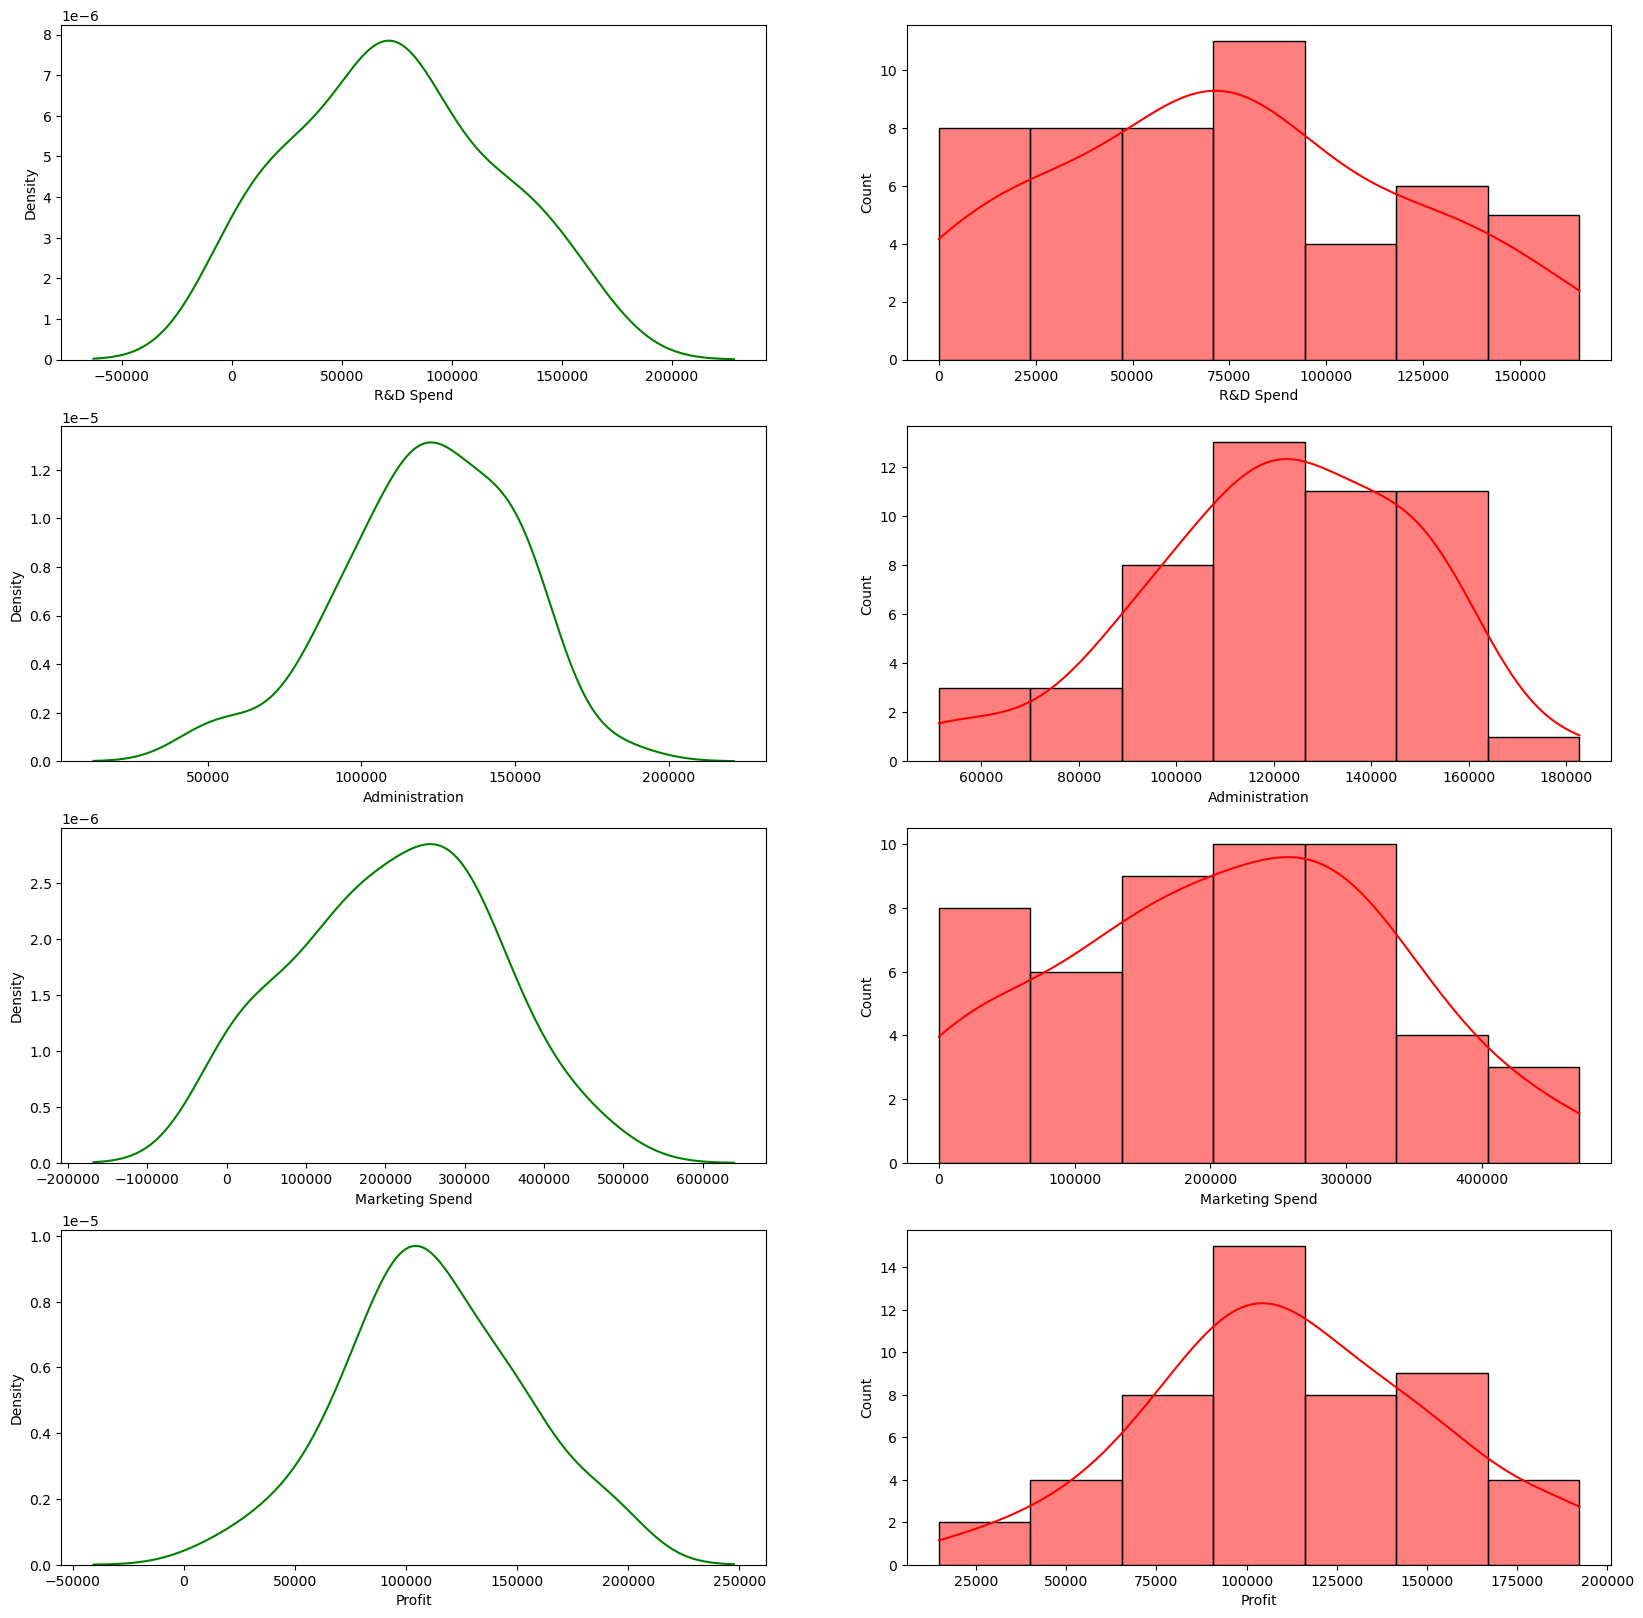

In [42]:
fig,ax=plt.subplots(4,2,figsize=(20,20))
m,n=0,0

for columns in d_float:
    sns.distplot(d[columns],hist=False,color='g',ax=ax[m][n])
    sns.histplot(d[columns],kde=True,color='r',ax=ax[m][n+1])
    m+=1


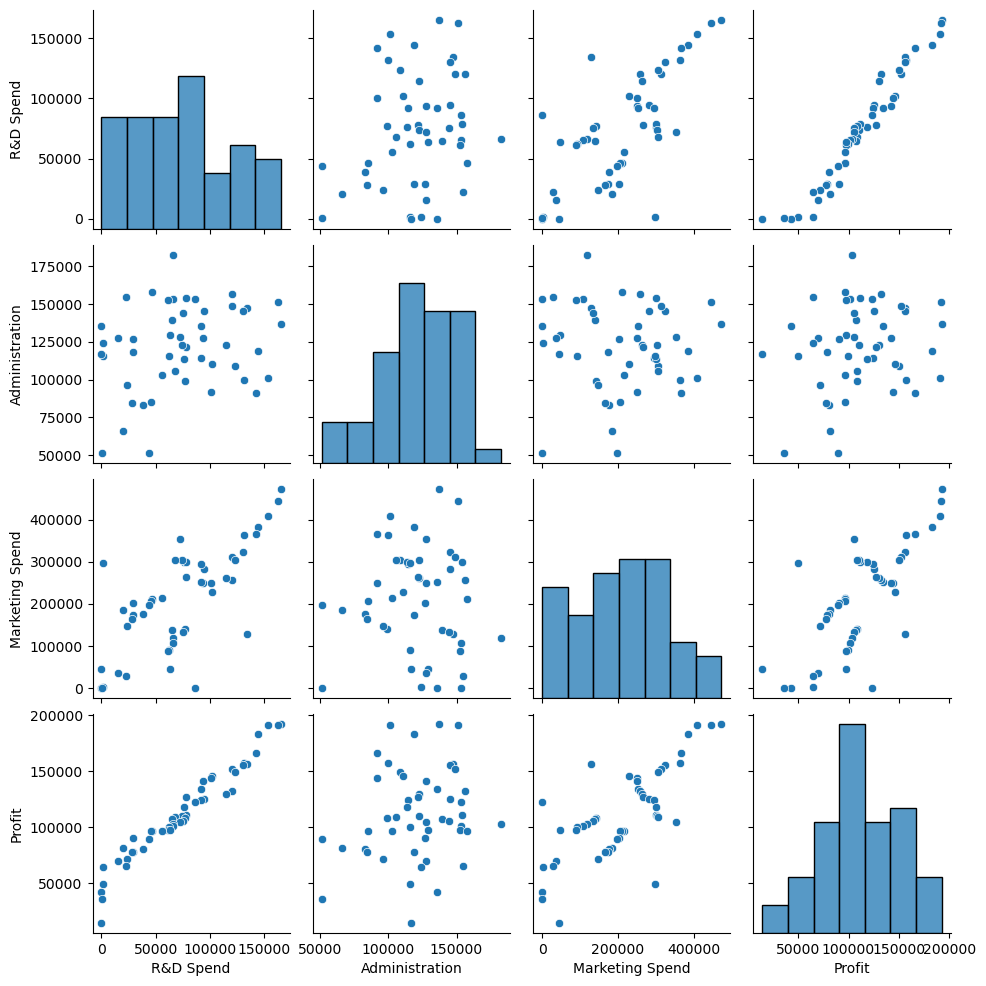

In [43]:
sns.pairplot(data=d)

In [44]:
d.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [45]:
state=pd.get_dummies(d['State'], dtype=int)

In [46]:
da=d.join(state)

In [47]:
da

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,0,1
6,134615.46,147198.87,127716.82,California,156122.51,1,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,0,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,0,1
9,123334.88,108679.17,304981.62,California,149759.96,1,0,0


In [48]:
da.drop(['State','Profit'],axis=1).corr()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
R&D Spend,1.000000,0.241955,0.724248,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,-0.168875,0.205685,-0.033670
California,-0.143165,-0.015478,-0.168875,1.000000,-0.492366,-0.515152
Florida,0.105711,0.010493,0.205685,-0.492366,1.000000,-0.492366
New York,0.039068,0.005145,-0.033670,-0.515152,-0.492366,1.000000


<Axes: >

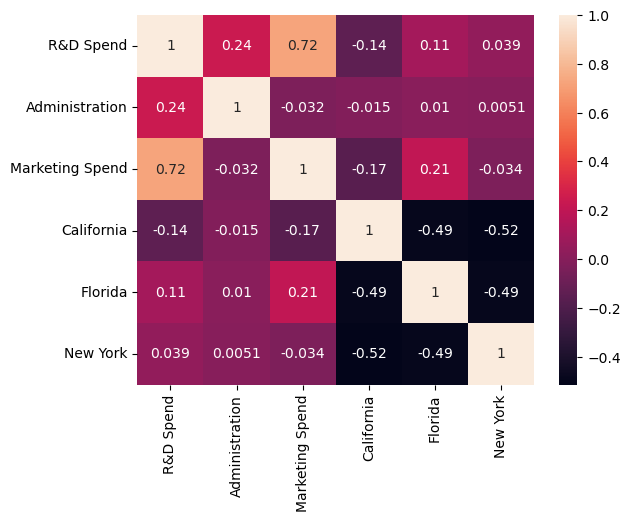

In [49]:
sns.heatmap(da.drop(['State','Profit'],axis=1).corr(), annot=True)

In [50]:
x=da.drop(['State','Profit'],axis=1)
y=da['Profit']

In [62]:
x

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [53]:
x_train.shape

(40, 6)

In [54]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [55]:
y_pred

array([126362.87908255,  84608.45383633,  99677.49425146,  46357.46068582,
       128750.48288505,  50912.41741878, 109741.35032702, 100643.24281647,
        97599.27574593, 113097.42524431])

In [56]:
print(r2_score(y_test,y_pred))

0.8987266414329449


In [64]:
d=pd.DataFrame(da,columns=['R&D Spend','Administration','Marketing','Spend','California','Florida','New York'])
d

,R&D Spend,Administration,Marketing,Spend,California,Florida,New York
0,165349.20,136897.80,NaN,NaN,0,0,1
1,162597.70,151377.59,NaN,NaN,1,0,0
2,153441.51,101145.55,NaN,NaN,0,1,0
3,144372.41,118671.85,NaN,NaN,0,0,1
4,142107.34,91391.77,NaN,NaN,0,1,0
5,131876.90,99814.71,NaN,NaN,0,0,1
6,134615.46,147198.87,NaN,NaN,1,0,0
7,130298.13,145530.06,NaN,NaN,0,1,0
8,120542.52,148718.95,NaN,NaN,0,0,1
9,123334.88,108679.17,NaN,NaN,1,0,0


In [65]:
import pickle 

In [66]:
pickle.dump(lr, open('StartupModel.pk1','wb'))

In [67]:
loaded_model=pickle.load(open('StartupModel.pk1','rb')) 

In [68]:
future_sale=loaded_model.predict(d)
future_sale

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Marketing
- Spend
Feature names seen at fit time, yet now missing:
- Marketing Spend
